
# Linear Regression 

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers = pd.read_csv('Ecommerce Customers.txt')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497,12.656,39.578,4.083,587.951
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926,11.109,37.269,2.664,392.205
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.001,11.330,37.111,4.105,487.548
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.306,13.718,36.721,3.120,581.852
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.331,12.795,37.537,4.446,599.406


In [4]:
customers.shape

(500, 8)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000,500.000,500.000,500.000,500.000
mean,33.053,12.052,37.060,3.533,499.314
std,0.993,0.994,1.010,0.999,79.315
min,29.532,8.508,33.914,0.270,256.671
25%,32.342,11.388,36.349,2.930,445.038
50%,33.082,11.983,37.069,3.534,498.888
75%,33.712,12.754,37.716,4.127,549.314
max,36.140,15.127,40.005,6.923,765.518


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

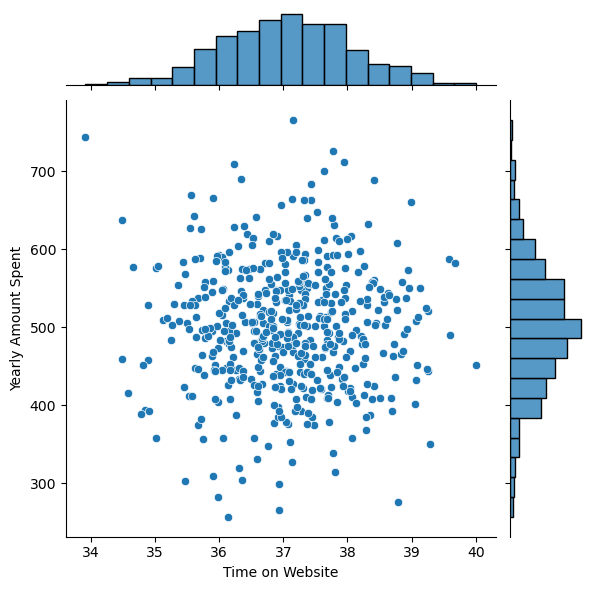

In [7]:
sns.jointplot(x=customers['Time on Website'], y=customers['Yearly Amount Spent']);

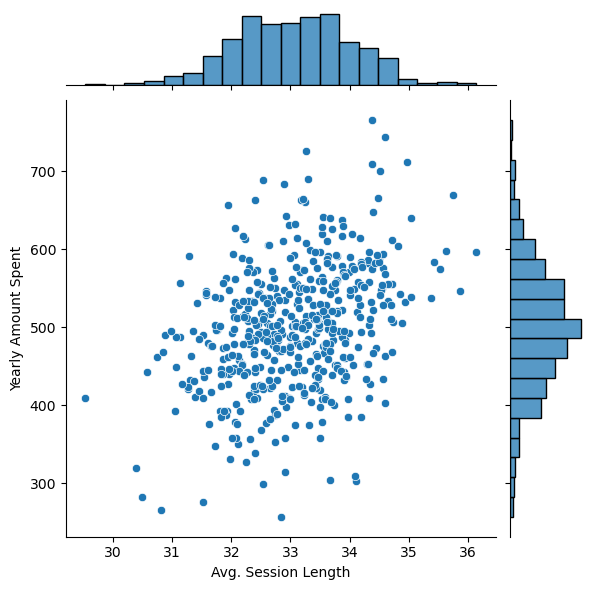

In [8]:
sns.jointplot(x=customers['Avg. Session Length'], y=customers['Yearly Amount Spent']);

** Do the same but with the Time on App column instead. **

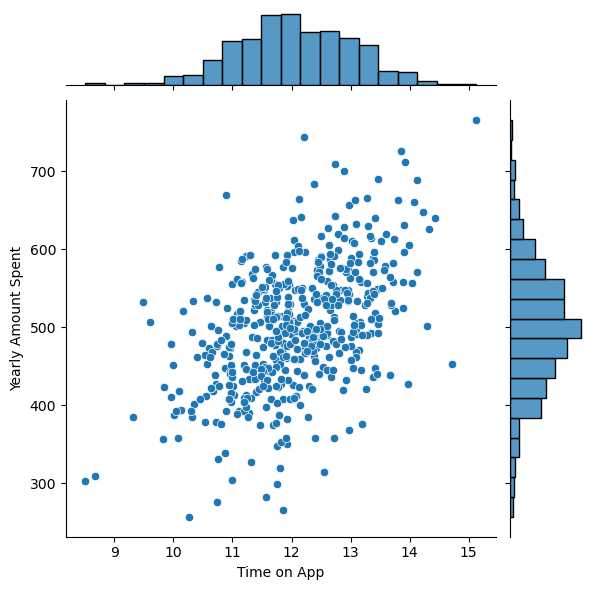

In [9]:
sns.jointplot(x=customers['Time on App'], y=customers['Yearly Amount Spent']);

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

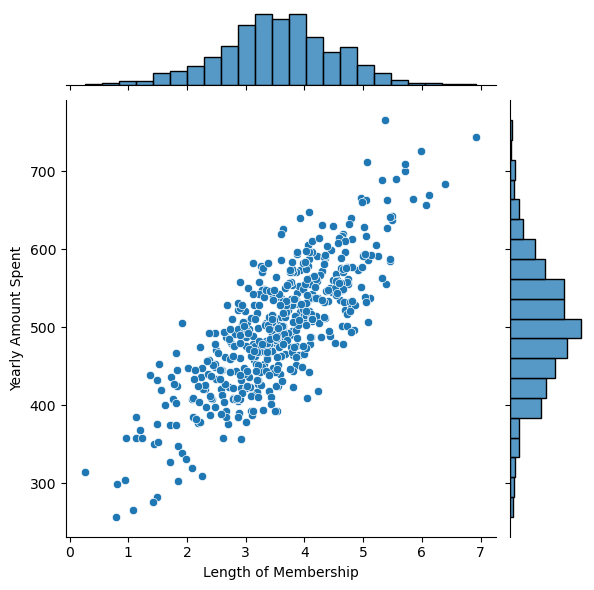

In [10]:
sns.jointplot(x=customers['Length of Membership'], y=customers['Yearly Amount Spent']);

In [11]:
customers.corr(numeric_only=True)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000,-0.028,-0.035,0.060,0.355
Time on App,-0.028,1.000,0.082,0.029,0.499
Time on Website,-0.035,0.082,1.000,-0.048,-0.003
Length of Membership,0.060,0.029,-0.048,1.000,0.809
Yearly Amount Spent,0.355,0.499,-0.003,0.809,1.000


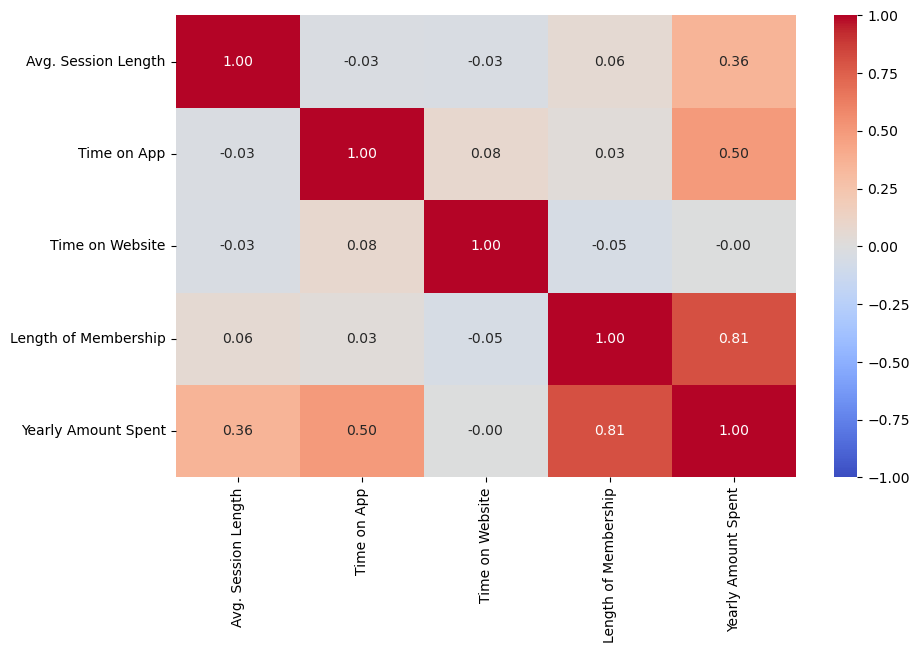

In [12]:
sns.heatmap(customers.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm");

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

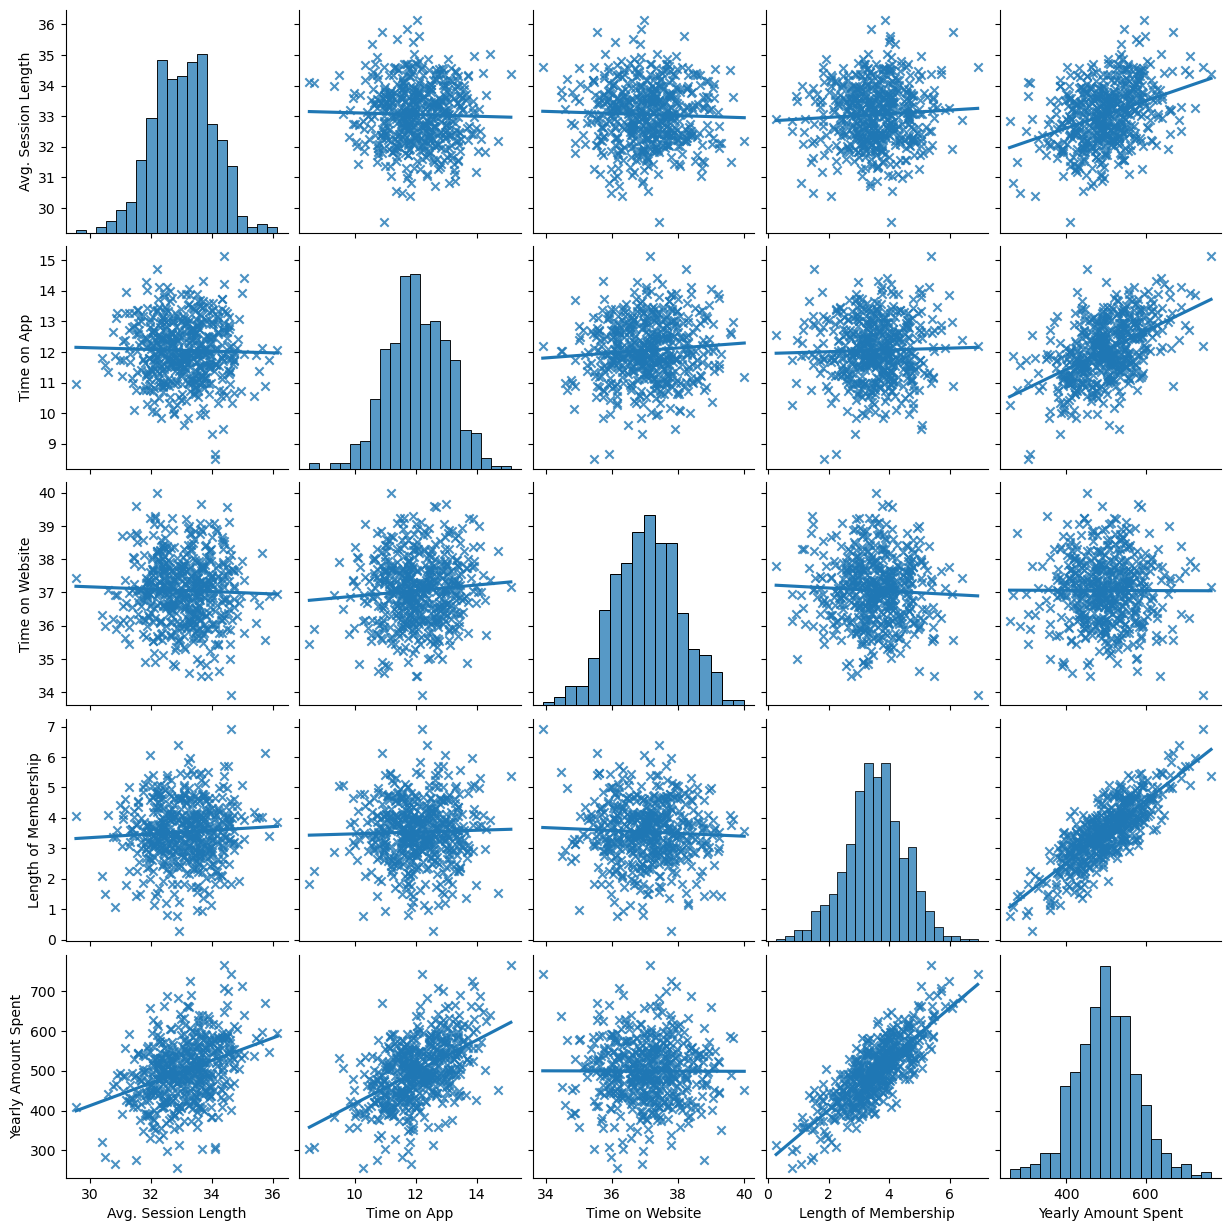

In [13]:
sns.pairplot(customers, kind='reg', plot_kws=dict(ci=None), markers="x");

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [14]:
# Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

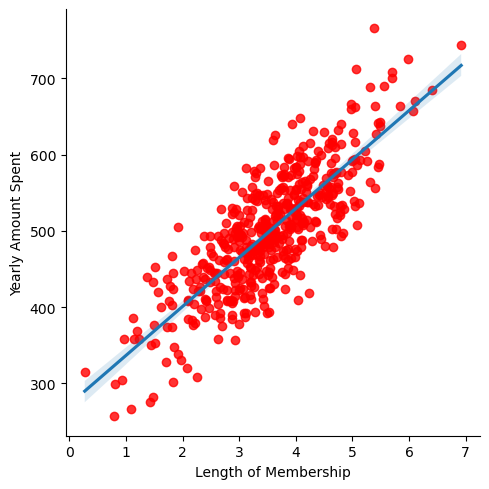

In [15]:
sns.lmplot(x='Length of Membership',
           y='Yearly Amount Spent', 
           data=customers, 
           scatter_kws={'color': 'red'});

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [16]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']] 

In [17]:
y = customers['Yearly Amount Spent'] 

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (350, 4)
Train target shape   :  (350,)
Test features shape  :  (150, 4)
Test target shape    :  (150,)


## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [21]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [22]:
lm=LinearRegression() ## object tanimlama 

** Train/fit lm on the training data.**

In [23]:
lm.fit(X_train, y_train) ## veriyi vererek modeli linear regressiona gore egit 

LinearRegression()

**Print out the coefficients of the model**

In [24]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [25]:
y_pred = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

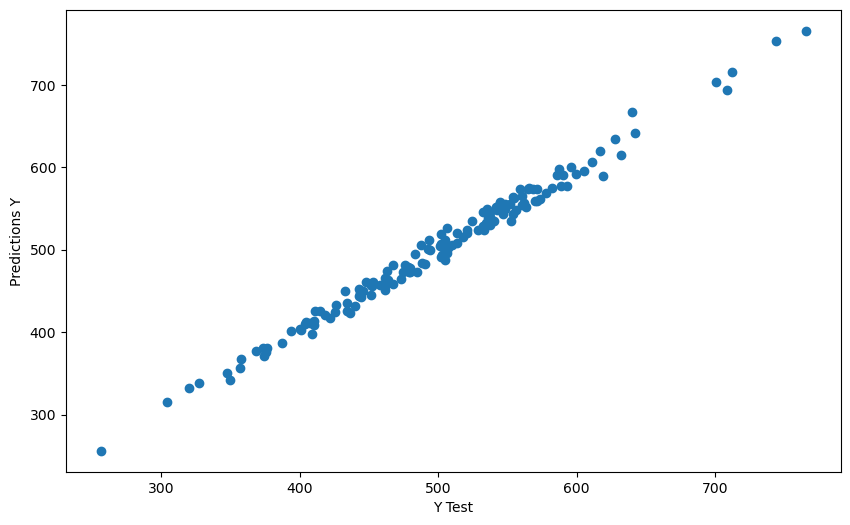

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predictions Y');

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [29]:
eval_metric(y_test, y_pred) # TEST SCORE

Model testing performance:
--------------------------
R2_score 	: 0.9890046246741234
MAE 		: 7.228148653430806
MSE 		: 79.8130516509741
RMSE 		: 8.933815066978614


### The close RMSE and MSE scores show that our model is a good one.

In [30]:
spent_mean = customers['Yearly Amount Spent'].mean()
spent_mean

499.31403825859053

In [31]:
mae = mean_absolute_error(y_test, y_pred)
mae

7.228148653430806

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

8.933815066978614

In [33]:
mae/spent_mean # It is useful to look at the errors superficially.

0.01447615748725937

In [34]:
rmse/spent_mean # It is useful to look at the errors superficially.

0.017892176831511127

In [35]:
y_train_pred = lm.predict(X_train)

In [36]:
eval_metric(y_train, y_train_pred) # TRAİN SCORE

Model testing performance:
--------------------------
R2_score 	: 0.9817562058732432
MAE 		: 8.18134728734284
MSE 		: 106.85137432285724
RMSE 		: 10.336893843068005


## Residuals

This is a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

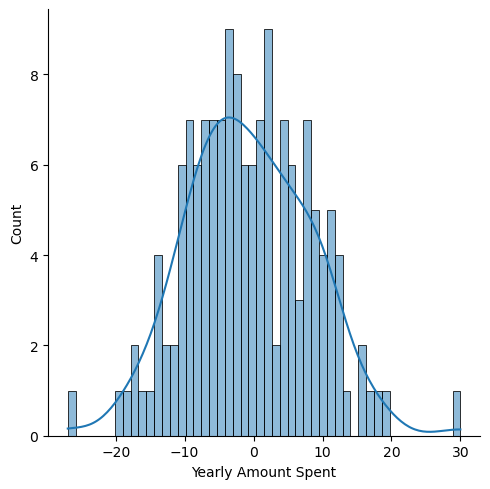

In [37]:
sns.displot((y_test-y_pred), bins=50, kde=True);

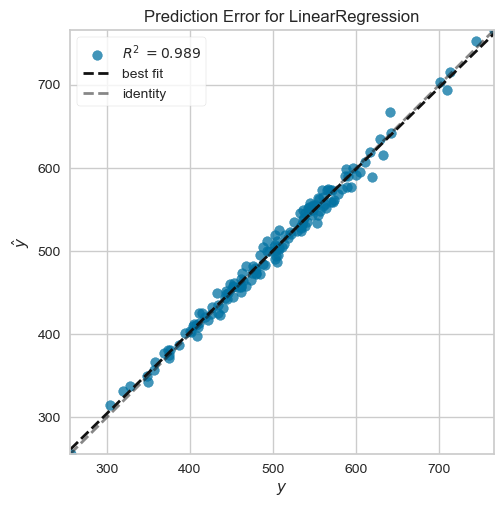

In [38]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [39]:
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Avg. Session Length,25.982
Time on App,38.590
Time on Website,0.190
Length of Membership,61.279


** How can you interpret these coefficients? **

Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

**Do you think the company should focus more on their mobile app or on their website?**

###### This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!

END OF THE PROJECT